**iFood Advanced Data Analyst Case**

Este Notebook tem por objetivo oferecer insights baseados nos dados fornecidos pelo case do iFood

### Indice

* Introdução
    * [Objetivos](#objetivos)
    * [Dados](#dados)
* Conhecendo os Dados
    * [Reunindo as Bibliotecas](#bibliotecas)
    * [Carregando os Dados](#carregando)

<a id='objetivos'></a>

Key Objectives and Deliverables are:
1. Explore the data – be creative and pay attention to the details. You need to provide the
marketing team a better understanding of the characteristic features of
respondents; How do variables connect with response rates? What other relationships
between variables are interesting for the business? Which actionable can we take out of
the EDA?
2. Propose and describe a customer segmentation based on customers’ behaviors; How
many and which profiles are there in the database? How does segmentation connect to
the campaign's financial return?
3. Create a predictive model which allows the company to maximize the profit of the next
marketing campaign. What is the best metric that correlates with the profitability of the
campaign? Simplicity and awareness of what is going on are preferred over
implementations of complex algorithms which you don’t master.4. Make a highly effective business presentation: Remember that the case must contain a
presentation that at the same time brings technical strength, insights and actionables,
but communicates with a non-technical audience such as a CMO. Take the audience on a
journey. Help them see the story of success and what it will bring

<a id='dados'></a>

**The Data**

    AcceptedCmp1 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response (target) 1 if customer accepted the offer in the last campaign, 0 otherwise
    Complain 1 if customer complained in the last 2 years
    DtCustomer data of customer's enrollment with the company
    Education customer's level of education
    Marital customer's marital status
    Kidhome number of small children in customer's household
    Teenhome number of teenagers in customer's household
    Income customer's yearly household income
    MntFishProducts amount spent on fish products in the last 2 years
    MntMeatProducts amount spent on meat products in the last 2 years
    MntFruits amount spent on fruits products in the last 2 years
    MntSweetProducts amount spent on sweet products in the last 2 years
    MntWines amount spent on wines products in the last 2 years
    MntGoldProds amount spent on gold products in the last 2 years
    NumDealsPurchases number of purchases made with discount
    NunCatalogPurchases number of purchases made using catalog
    NunStorePurchases number of purchases made directly in stores
    NumWebPurchases number of purchases made through company's web site
    NumWebVisitsMonth number of visits to company's web site in the last month
    Recency number of days since the last purchase

<a id='bibliotecas'></a>
Reunindo as Bibliotecas

In [37]:
import pandas as pd
import seaborn as sns

<a id='carregando'></a>
**Carregando os Dados**

In [92]:
dfCustomers = pd.read_csv("https://raw.githubusercontent.com/ifood/ifood-data-advanced-analytics-test/master/ml_project1_data.csv")

In [80]:
dfCustomers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [81]:
dfCustomers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

**Colunas sem descrição prévia**

- Year_Birth
- Z_CostContact
- Z_Revenue

In [84]:
dfCustomers.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [93]:
dfCustomers.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [86]:
dfCustomers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

**Verificando dados faltosos**

In [87]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [96]:
dfCustomers.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

**Dropando os nulos**

In [106]:
DfCustomersNulls = dfCustomers[dfCustomers['Income'].isna()]
DfCustomersNulls

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [111]:
dfCustomers.dropna(inplace =True)
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

**Verificando Outliers**

<AxesSubplot:ylabel='Income'>

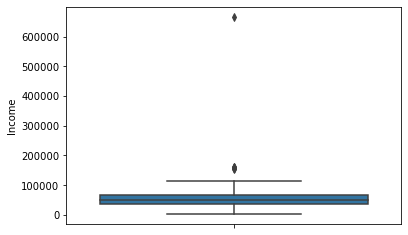

In [112]:
sns.boxplot(y='Income', data=dfCustomers)

In [113]:
dfCustomerOutlier = dfCustomers[dfCustomers['Income']>600000]
dfCustomerOutlier

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,0,0,0,0,0,0,0


**Dropando os outliers** 

In [114]:
dfCustomers = dfCustomers[dfCustomers['Income']<600000]
dfCustomers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Income'>

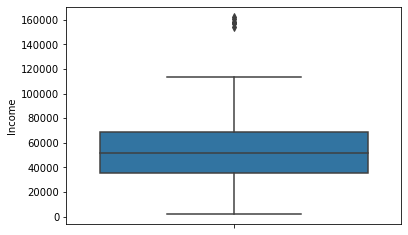

In [115]:
sns.boxplot(y='Income', data=dfCustomers)

Explore the data – be creative and pay attention to the details. You need to provide the
marketing team a better understanding of the characteristic features of
respondents

**Verificando Variáveis não numéricas**

In [121]:
dfCustomers['Education'].value_counts()

Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [122]:
dfCustomers['Marital_Status'].value_counts()

Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

**Verificando estados cívis não reconhecidos**

In [128]:
dfCustomersunknowmarital = dfCustomers[(dfCustomers['Marital_Status']=="Alone") | (dfCustomers['Marital_Status']=="Absurd") | (dfCustomers['Marital_Status']=="YOLO")]
dfCustomersunknowmarital

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,1,6,8,0,0,0,0,0,0,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,0,4,6,0,0,0,0,0,0,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1


**Excluindo estados cívis não reconhecidos**

In [133]:
dfCustomers.drop(dfCustomersunknowmarital.index, inplace=True)

C:\Users\HP 840\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [134]:
dfCustomers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


**Criando coluna -> Cliente a quantos dias**

In [136]:
dfCustomers['Dt_Customer']=pd.to_datetime(dfCustomers['Dt_Customer'],format='%Y-%m-%d')

<ipython-input-136-6ef238b16c8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCustomers['Dt_Customer']=pd.to_datetime(dfCustomers['Dt_Customer'],format='%Y-%m-%d')


In [139]:
dfCustomers.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

In [179]:
from datetime import datetime, date

In [180]:
hoje = '2021-03-24'
hoje = datetime.strptime(hoje,'%Y-%m-%d')

ontem = '2021-03-23'
ontem = datetime.strptime(ontem,'%Y-%m-%d')

today = date.today()

resultado = hoje - ontem
resultado.days
today

datetime.date(2021, 3, 24)

In [157]:
dfCustomers['custdays']=(hoje - dfCustomers['Dt_Customer'])

<ipython-input-157-5d1dc36b84d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCustomers['custdays']=(hoje - dfCustomers['Dt_Customer'])


In [169]:
dfCustomers['custdays'] = dfCustomers['custdays'].dt.days

<ipython-input-169-af0e90747342>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCustomers['custdays'] = dfCustomers['custdays'].dt.days


**Outra forma**

In [171]:
dfCustomers['custdays'] = dfCustomers['Dt_Customer'].apply(lambda x: (hoje-x).days)

<ipython-input-171-098985459fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCustomers['custdays'] = dfCustomers['Dt_Customer'].apply(lambda x: (hoje-x).days);


In [176]:
dfCustomers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,custdays
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,3123
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,2573
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,2772
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,2599
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,2621


In [ ]:
dropcolumns